In [1]:
from pymc3 import Model, Uniform, Normal, Binomial, traceplot
from pymc3 import fit
from pymc3 import Deterministic

/opt/conda/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [3]:
dados_experimento = pd.read_csv("Dados_duracao_femea.csv")



def map_300_all(x):
    return 300.0


dados_experimento["d_total_experimento" ] = dados_experimento["d_total_experimento"].apply(map_300_all)

dados_experimento

,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
0,72.500000,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298307,5ea2305b93f4d55ef0298303,femea,flx2.5mg,A1
1,40.000000,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298310,5ea2305b93f4d55ef029830c,femea,flx2.5mg,A2
2,124.666667,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298319,5ea2305b93f4d55ef0298315,femea,flx2.5mg,A3
3,101.500000,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298322,5ea2305c93f4d55ef029831e,femea,flx2.5mg,A4
4,38.766667,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef029832b,5ea2305c93f4d55ef0298327,femea,flx2.5mg,A5
5,63.800000,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298334,5ea2305c93f4d55ef0298330,femea,flx2.5mg,A6
6,68.666667,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305d93f4d55ef029833d,5ea2305d93f4d55ef0298339,femea,flx2.5mg,A7
7,200.166667,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305d93f4d55ef0298346,5ea2305d93f4d55ef0298342,femea,flx2.5mg,A8
8,51.300000,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305f93f4d55ef0298385,5ea2305f93f4d55ef0298381,femea,veiculo,A1
9,82.933333,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306093f4d55ef029838e,5ea2306093f4d55ef029838a,femea,veiculo,A2


In [4]:
# Arrendondando os valores

In [5]:
dados_experimento["d_e_Immobility_s"] = dados_experimento["d_e_Immobility_s"].apply(math.ceil)

In [6]:
dados_experimento.head()

,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
0,73,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298307,5ea2305b93f4d55ef0298303,femea,flx2.5mg,A1
1,40,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298310,5ea2305b93f4d55ef029830c,femea,flx2.5mg,A2
2,125,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298319,5ea2305b93f4d55ef0298315,femea,flx2.5mg,A3
3,102,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298322,5ea2305c93f4d55ef029831e,femea,flx2.5mg,A4
4,39,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef029832b,5ea2305c93f4d55ef0298327,femea,flx2.5mg,A5


In [7]:
dados_veiculo = dados_experimento[dados_experimento["dosagem"] =="veiculo"]
dados_veiculo

,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
8,52,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305f93f4d55ef0298385,5ea2305f93f4d55ef0298381,femea,veiculo,A1
9,83,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306093f4d55ef029838e,5ea2306093f4d55ef029838a,femea,veiculo,A2
10,86,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306093f4d55ef0298397,5ea2306093f4d55ef0298393,femea,veiculo,A3
11,49,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306193f4d55ef02983a0,5ea2306193f4d55ef029839c,femea,veiculo,A4
12,35,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306193f4d55ef02983a9,5ea2306193f4d55ef02983a5,femea,veiculo,A5
13,76,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306193f4d55ef02983b2,5ea2306193f4d55ef02983ae,femea,veiculo,A6
14,117,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306293f4d55ef02983bb,5ea2306293f4d55ef02983b7,femea,veiculo,A7
15,108,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306293f4d55ef02983c4,5ea2306293f4d55ef02983c0,femea,veiculo,A8
16,76,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2306293f4d55ef02983cd,5ea2306293f4d55ef02983c9,femea,veiculo,A9


In [8]:
dados_flx = dados_experimento[dados_experimento["dosagem"] =="flx2.5mg"]
dados_flx

,d_e_Immobility_s,d_total_experimento,path_experimento,id_eto,id_j,sexo,dosagem,unidade
0,73,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298307,5ea2305b93f4d55ef0298303,femea,flx2.5mg,A1
1,40,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298310,5ea2305b93f4d55ef029830c,femea,flx2.5mg,A2
2,125,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305b93f4d55ef0298319,5ea2305b93f4d55ef0298315,femea,flx2.5mg,A3
3,102,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298322,5ea2305c93f4d55ef029831e,femea,flx2.5mg,A4
4,39,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef029832b,5ea2305c93f4d55ef0298327,femea,flx2.5mg,A5
5,64,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305c93f4d55ef0298334,5ea2305c93f4d55ef0298330,femea,flx2.5mg,A6
6,69,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305d93f4d55ef029833d,5ea2305d93f4d55ef0298339,femea,flx2.5mg,A7
7,201,300.0,C:/Mestrado Oficial Marino/Videos cegados/Cali...,5ea2305d93f4d55ef0298346,5ea2305d93f4d55ef0298342,femea,flx2.5mg,A8


In [9]:
# duracao_imobilidade = dados_veiculo["d_e_Immobility_s"]
n_veiculo = dados_veiculo["d_total_experimento"]
n_flx = dados_flx["d_total_experimento"]
with Model() as imobilidade_model_veiculo:
#     probabilidade do animal adotar a postura de imobilidade vai de 0% até 100
    p_imobilidade_veiculo = Uniform("p_imobilidade_veiculo", lower=0, upper=1)
    imobilidade_dado_p_veiculo = Binomial('imobilidade_dado_p_veiculo', p=p_imobilidade_veiculo, observed=dados_veiculo["d_e_Immobility_s"], n=n_veiculo)
    
    p_imobilidade_flx = Uniform("p_imobilidade_flx", lower=0, upper=1)
    imobilidade_dado_p_flx = Binomial('imobilidade_dado_p_flx', p=p_imobilidade_flx, observed=dados_flx["d_e_Immobility_s"], n=n_flx)
    dif_p = Deterministic('dif_p', p_imobilidade_flx - p_imobilidade_veiculo )
    
    
    
    #     samples_flx =  fit(random_seed=10000).sample(100000)

In [10]:
# with imobilidade_model_veiculo:
#     diff_of_means = Deterministic('difference of means', p_imobilidade_flx - p_imobilidade_veiculo)   
#     effect_size = Deterministic('effect size',
#                                 diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))
    
    

In [11]:
tamanho_amostra = 100000
with imobilidade_model_veiculo:
    samples =  fit(random_seed=10000).sample(tamanho_amostra)

Average Loss = 274.83: 100%|██████████| 10000/10000 [00:40<00:00, 245.38it/s]
Finished [100%]: Average Loss = 274.79


In [12]:
from pymc3 import plot_posterior

/opt/conda/lib/python3.8/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<Axes: title={'center': 'p_imobilidade_veiculo'}>,
       <Axes: title={'center': 'p_imobilidade_flx'}>], dtype=object)

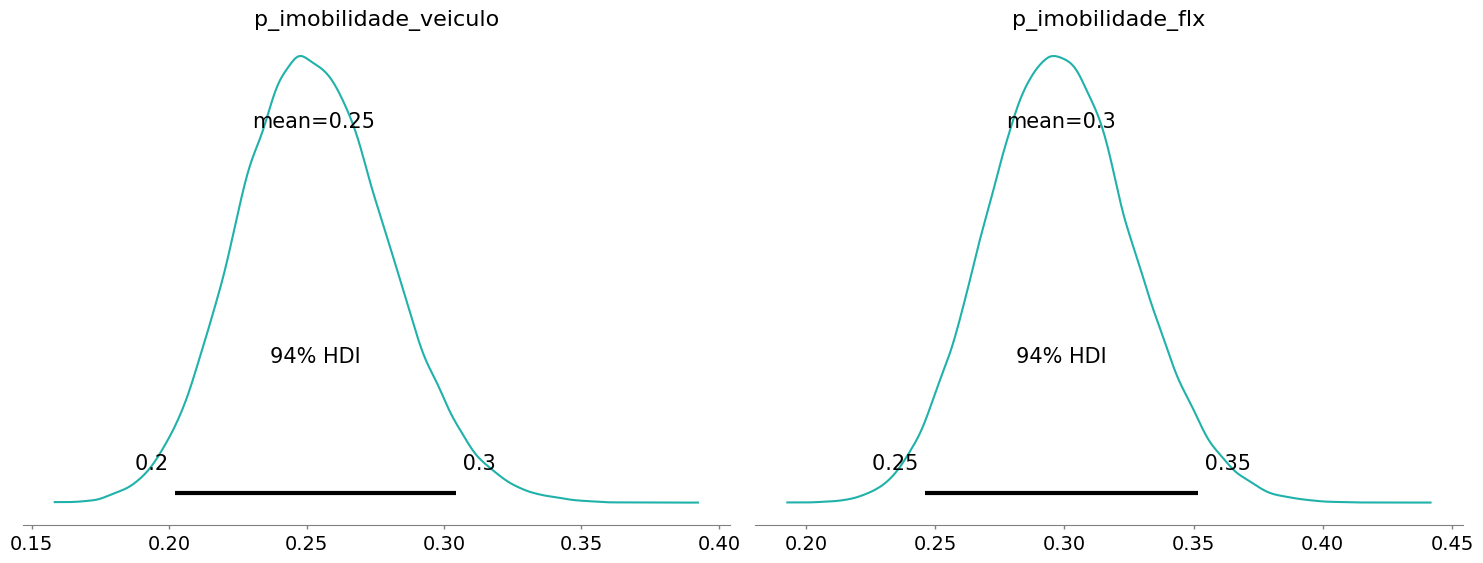

In [13]:
plot_posterior(samples, varnames=["p_imobilidade_veiculo", "p_imobilidade_flx"], color="LightSeaGreen")

array([[<Axes: title={'center': 'p_imobilidade_veiculo'}>,
        <Axes: title={'center': 'p_imobilidade_veiculo'}>],
       [<Axes: title={'center': 'p_imobilidade_flx'}>,
        <Axes: title={'center': 'p_imobilidade_flx'}>],
       [<Axes: title={'center': 'dif_p'}>,
        <Axes: title={'center': 'dif_p'}>]], dtype=object)

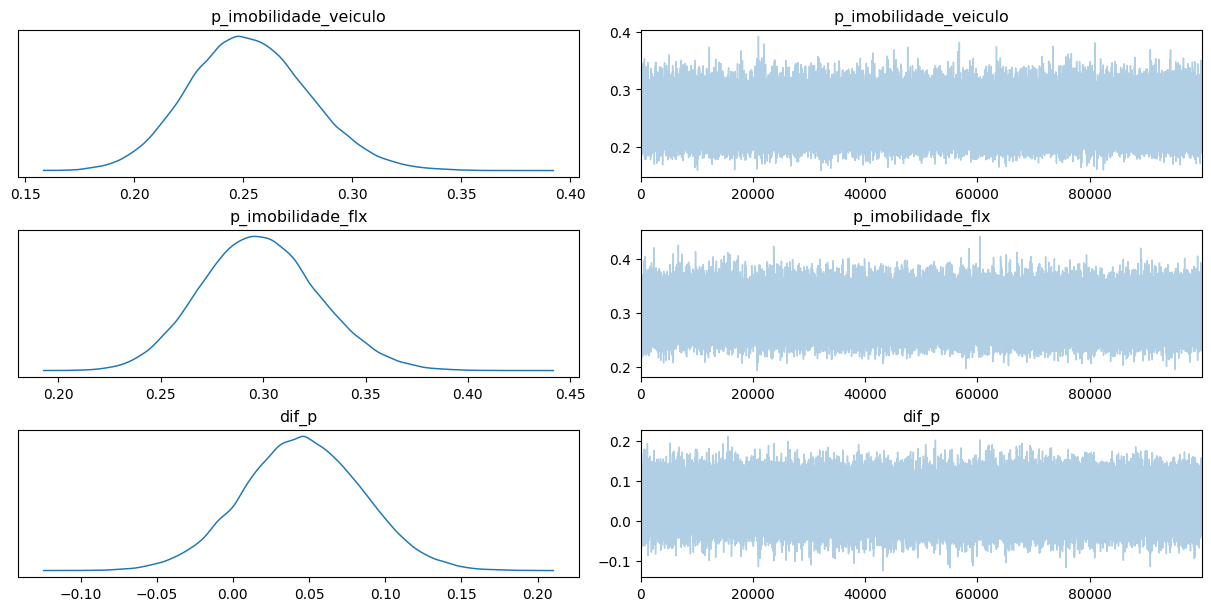

In [14]:
traceplot(samples , varnames=['p_imobilidade_veiculo', 'p_imobilidade_flx', 'dif_p'])

In [15]:
np.mean(samples["p_imobilidade_veiculo"])

0.25269101937651073

In [16]:
def calculo_tamanho_efeito(veiculo, tratado):
    m_veiculo = np.mean(veiculo)
    m_tratado = np.mean(tratado)
    var_veiculo = np.var(veiculo)
    var_tratado = np.var(tratado)
    # cohen tamanho do efeito, simplificado.
    diff_of_means =  m_tratado - m_veiculo
    effect_size = diff_of_means / np.sqrt((var_veiculo + var_tratado) / 2)
    return effect_size

In [17]:
print(f'O tamanho do efeito, usando a formula de Cohen, foi de: {calculo_tamanho_efeito(samples["p_imobilidade_veiculo"], samples["p_imobilidade_flx"])} . Medido em des')

O tamanho do efeito, usando a formula de Cohen, foi de: 1.6503404419468657 . Medido em des


In [18]:
from matplotlib.pyplot import figure

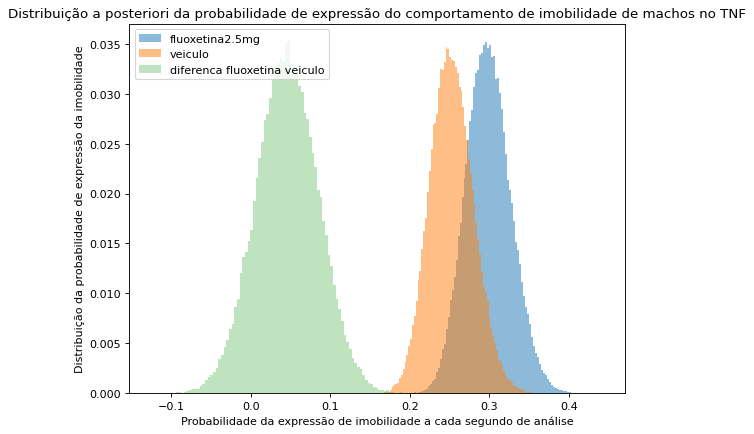

In [19]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist( samples["p_imobilidade_flx"], bins= 100,
         weights=np.full(tamanho_amostra , 1/tamanho_amostra), label="fluoxetina2.5mg", alpha=0.5)
plt.hist( samples["p_imobilidade_veiculo"], bins= 100, 
         weights=np.full(tamanho_amostra , 1/tamanho_amostra), label="veiculo", alpha=0.5)
plt.hist( samples["dif_p"], bins= 100, 
         weights=np.full(tamanho_amostra , 1/tamanho_amostra), label="diferenca fluoxetina veiculo", alpha=0.3)


plt.title("Distribuição a posteriori da probabilidade de expressão do comportamento de imobilidade de machos no TNF")
plt.ylabel("Distribuição da probabilidade de expressão da imobilidade")
plt.xlabel("Probabilidade da expressão de imobilidade a cada segundo de análise")
plt.legend()
plt.show()

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame()

In [22]:
df["femea_p_imobilidade_flx"] = samples["p_imobilidade_flx"]
df["femea_p_imobilidade_veiculo"] = samples["p_imobilidade_veiculo"]
df["femea_dif_p"] = samples["dif_p"]
df.head()

,femea_p_imobilidade_flx,femea_p_imobilidade_veiculo,femea_dif_p
0,0.313319,0.313710,-0.000391
1,0.327894,0.249025,0.078869
2,0.273994,0.182879,0.091115
3,0.304585,0.248223,0.056362
4,0.287720,0.254672,0.033047


In [23]:
# df.to_csv("femea_bayes.csv", index= False)

In [24]:
print(f'O tamanho do efeito, usando a formula de Cohen, foi de: {calculo_tamanho_efeito(samples["p_imobilidade_veiculo"], samples["p_imobilidade_flx"])} . Medido em desvio padrão')

O tamanho do efeito, usando a formula de Cohen, foi de: 1.6503404419468657 . Medido em desvio padrão


In [25]:
dif = samples["dif_p"]
tamanho_amostra = len(dif) 
filt_dif = dif <0 

menor_0 = len(dif[filt_dif])
p_ser_menor_0 = menor_0 /tamanho_amostra

print(f"A diferença entre o controle e o tratado ser menor que 0 é de : {100*p_ser_menor_0}%")

A diferença entre o controle e o tratado ser menor que 0 é de : 11.983%


In [26]:
filt_dif_maior = dif >0 

maior_0 = len(dif[filt_dif_maior])
p_ser_maior_0 = maior_0 /tamanho_amostra


print(f"A probabilidade de que a diferença entre o controle e o tratado ser maior que 0 é de : {100*p_ser_maior_0}%")

A probabilidade de que a diferença entre o controle e o tratado ser maior que 0 é de : 88.017%


In [27]:
import seaborn as sns
import arviz as az

In [28]:
sns.set(color_codes=True)


In [29]:
def creat_struct_saida(data):
    saida = {}
    saida["data"] = data
    saida["x_weights"] = np.ones_like(data) / len(data)
    
    saida["hdi"] = az.hdi(data, hdi_prob=.94)
    saida["prob"] =[0.01, 0.01]
    return saida
    

In [30]:
p_imob_flx_femea = samples["p_imobilidade_flx"]



# data = samples["p_imobilidade_flx"]

# x_weights = np.ones_like(data) / len(data)

# sns.distplot(data, hist_kws={'weights': x_weights}, kde=False);
# fmri = {}
# fmri["hdi"] = az.hdi(data, hdi_prob=.94)
# fmri["prob"] =[0.01, 0.01]


# sns.lineplot(x="hdi", y="prob", data=fmri)

In [31]:
creat_struct_saida(samples["p_imobilidade_flx"])

{'data': array([0.31331881, 0.32789397, 0.27399423, ..., 0.29282059, 0.2417272 ,
        0.27020595]),
 'x_weights': array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]),
 'hdi': array([0.24592297, 0.35180884]),
 'prob': [0.01, 0.01]}

In [32]:
print(fmri["hdi"] )

NameError: name 'fmri' is not defined